In [ ]:
run(`git clone https://github.com/GlobalClimateForum/DIVACoast.jl.git`)

In [ ]:
cd("DIVACoast.jl") 
pwd()

Import packages

In [ ]:
using Pkg
Pkg.add("Statistics")
Pkg.instantiate()

Load DIVACoast package

In [ ]:
include("src/DIVACoast.jl")
using .DIVACoast
using Printf
using Plots

Base.show(io::IO, f::Float64) = @printf(io, "%.2f", f)
Base.show(io::IO, f::Float32) = @printf(io, "%.2f", f)
cd(@__DIR__)

  Activating project at `c:\Users\voelz\Documents\DIVA\DIVACoast`


┌                                       ┐
│ DIVACoast.jl | © GLOBAL CLIMATE FORUM │
└                                       ┘


Load the hypsometric profiles for each segment in the UK and Ireland 

(They are precomputed and saved in the file "UKIRL_hspfs_floodplains.nc")

In [ ]:
hspfs = load_hsps_nc(Int32, Float32, "testdata/UKIRL/nc/UKIRL_hspfs_floodplains.nc")

floodplain_id,geometry
Categorical,PolyArea
[NoUnits],🖈 Cartesian{NoDatum}
0,"PolyArea(36-Ring, 6-Ring)"
1,"PolyArea((x: -1.26 m, y: 59.98 m), ..., (x: -1.26 m, y: 59.98 m))"
2,"PolyArea(106-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring)"
3,"PolyArea((x: -1.29 m, y: 59.92 m), ..., (x: -1.29 m, y: 59.92 m))"
4,"PolyArea(66-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring, 4-Ring)"
5,"PolyArea((x: -1.28 m, y: 59.88 m), ..., (x: -1.28 m, y: 59.88 m))"
7,"PolyArea(90-Ring, 4-Ring)"
10,"PolyArea((x: -2.93 m, y: 59.36 m), ..., (x: -2.93 m, y: 59.36 m))"


We choose the hypsometric profile of a specific floodplain 

(We can visually inspect which floodplain we want to choose by opening "../testdata/UKIRL/gpkg/UKIRL_merit_coastplain_lecz_H100+2m_GADM1_partitioned.gpkg", for example in QGIS, and identify the floodplain ID "fpid")


In [ ]:
london = hspfs[2474]

HypsometricProfile{Float32}(78.31, "km", Float32[-5.00, -4.90, -4.80, -4.70, -4.60, -4.50, -4.40, -4.30, -4.20, -4.10  …  19.10, 19.20, 19.30, 19.40, 19.50, 19.60, 19.70, 19.80, 19.90, 20.00], "m", Float32[0.00, 0.12, 0.13, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.17  …  674.23, 678.82, 683.10, 687.52, 691.53, 695.42, 699.08, 702.48, 706.54, 710.52], "km^2", Matrix{Float32}(undef, 251, 0), (), String[], Float32[0.00 0.00; 45.04 6728625.50; … ; 3536871.00 521768796160.00; 3558934.50 524979568640.00], (:population, :assets), ["", ""], true)

Plot the hypsometric profile of London

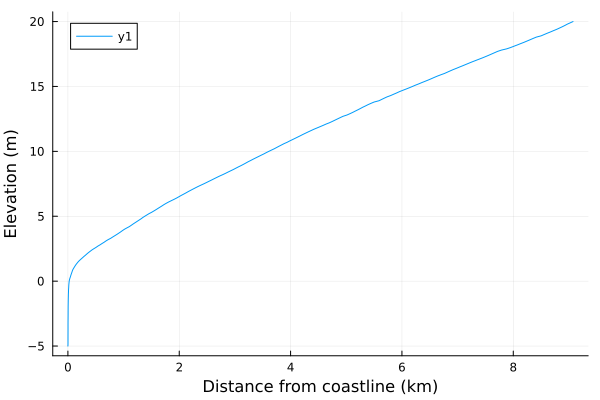

In [50]:
plot(london)

Get exposure of poeple and assets in this floodplain using a bathtub model

In [54]:
println("Exposure (people) below 5 m: $(exposure_below_bathtub(london,5.0)[3][1])")
println("Exposure (assets) below 5 m: $(exposure_below_bathtub(london,5.0)[3][2])")

Exposure (people) below 5 m: 253533.53
Exposure (assets) below 5 m: 3.5214684e10


Do a little exposure/damage calculation for different water-levels. What do we notice?

In [7]:
#damage_bathtub_standard_ddf(hp, x, 0f0, Vector{Float32}(), [1f0])
println("damage:")
for wl in 0.00f0:0.25f0:5.00f0
  expo = exposure(south_london, wl)
  dam  = damage_bathtub_standard_ddf(south_london, wl, 0f0, [], [0f0,1f0])
  println("waterlevel $wl m\t:  exposure = $expo; \t damage = $dam")
end


damage:


UndefVarError: UndefVarError: `exposure` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Compare different damage calculations

In [8]:
println("Fast calculation (8m flood): damage_standard_ddf(south_london, 3.0, 0f0, [], [0f0,1f0]) = ")
@time dam = damage_standard_ddf(south_london, 8.0, 0f0, [], [0f0,1f0])
@time dam = damage_standard_ddf(south_london, 8.0, 0f0, [], [0f0,1f0])
println(dam)


Fast calculation (8m flood): damage_standard_ddf(south_london, 3.0, 0f0, [], [0f0,1f0]) = 


UndefVarError: UndefVarError: `damage_standard_ddf` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

We now define the depth-damage functions (ddf's) explicitly with parameter $h$

$ddf(h)=: f(d)= \frac{d}{d+h}$

In [9]:
ddf0(d :: Float32) = 1f0

ddf(h :: Float32) = function(d :: Float32);
  return (d / (d+h))
end

ddf (generic function with 1 method)

These calls should lead to the same results as the ones above - but with slightly slower computation times

In [10]:
println("Slower calculation (8m flood): damage(south_london, 8.0, ddf0, [], [ddf0,ddf(1.0f0)]) = ")
@time dam = damage(south_london, 3.0, ddf0, [], [ddf0,ddf(1.0f0)])
@time dam = damage(south_london, 3.0, ddf0, [], [ddf0,ddf(1.0f0)])
println(dam)

Slower calculation (8m flood): damage(south_london, 8.0, ddf0, [], [ddf0,ddf(1.0f0)]) = 


UndefVarError: UndefVarError: `damage` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [11]:
#do expected damages? but with what GEV/GPD function?

Now we test to compute damages for all floodplains in the UK and IRL (8.0m flood everywhere)

we define a helper function that does the accumulation

$f(hspfs,wl,..)= \sum_{hspfs} $ damage_standard_ddf $ (hspf,wl,..)$

In [12]:
function damage_all_fp(hspfs, wl, hdd_area, hdds_static, hdds_dynamic) 
    r = 0.0f0
    for (fpid, hspf) in hspfs
      r += damage_standard_ddf(hspf, wl, hdd_area, hdds_static, hdds_dynamic)[3][2]
    end
    return r
  end  

damage_all_fp (generic function with 1 method)

All the computation below should come up with the same result (except from liitle numerical differences)

In [13]:
println("8m flood everywhere, fast computation")
@time dam=sum(map(x -> damage_standard_ddf(hspfs[x], 8.0, 0f0, [], [0f0,1f0])[3][2], collect(keys(hspfs))))
@time dam=sum(map(x -> damage_standard_ddf(hspfs[x], 8.0, 0f0, [], [0f0,1f0])[3][2], collect(keys(hspfs))))
println(dam)

8m flood everywhere, fast computation


UndefVarError: UndefVarError: `damage_standard_ddf` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [14]:
println("8m flood everywhere, faster computation")
@time dam=damage_all_fp(hspfs, 8.0, 0f0, [], [0f0,1f0])
@time dam=damage_all_fp(hspfs, 8.0, 0f0, [], [0f0,1f0])
println(dam)

8m flood everywhere, faster computation


UndefVarError: UndefVarError: `damage_standard_ddf` not defined in `Main`
Suggestion: check for spelling errors or missing imports.